In [1]:
"""A design example of an angular column on a slab according
to the provisions of §6.4 in EC2.
"""
import matplotlib.pyplot as plt
import ipywidgets as widgets

from dx_punch.EC2.slab import Slab
from dx_eurocode.EC2.materials import RC
import json
%matplotlib inline

In [2]:
slab_data = {
    'type': 'floor-slab', # {['floor-slab'], 'raft', 'base'}
    'geometry': {
        'bx': 6.25, # breadth along x
        'by': 11.45, # breadh along y
        'thickness': 0.30,
        # Position of the origin of the coordinate-system of the shape (one of the four vertices of the rectangle,
        # or the centroid)
        'position': 'lower-left' # {'lower-left', 'lower-right', 'upper-left', 'upper-right', ['centroid']}
    },
    'materials': {
        'fck': 30, # Characteristic cylinder strength of concrete [MPa]
        'fyk': 500 # Characteristic yield strength of steel [MPa]
    },
    'reinforcement': { # Distribution of reinforcement on the slab
        'uniform': [{
            # The axis along which the bars are distributed
            'axes': 'xy', # {['x'], 'y', 'xy'}. If 'xy', it is assumed that reinforcement is uniform along
            # both axes
            'phi': 0.010, # bar diameter [m]
            's': 0.200, # spacing [m]
            'd': 0.27 # effective depth [m]
        },
        ],
    },
    'soil-pressure': [{
        'LC': 'LC0', # Should be consistent with the load-case names of the internal forces
        'value': 0.  # [Pa]
    },
    ],
    'columns': [{
        'id': 'C0',
        'geometry': {
            'shape': 'angle',
            'bx': 0.35, # breadth of the leg along x
            'by': 0.35, # breadth of the leg along y
            'tx': 0.15, # thickness of the leg along y
            'ty': 0.15, # thickness of the leg along x
            'origin': {"x": 6., "y": 11.}, # Coordinates of the intersection point of the external faces of the legs
            'orientation': 180.  # Orientation of the section in degrees. 0 corresponds to an angle whose legs
                                 # extend toward the positive direction of the two axes.
        },
        'load-cases': [{
            'name': 'LC0',
            'N': 111e+03,  # Compressive force [N]
            'Mex': 25e+03, # [N.m]
            'Mey': 22e+03, # [N.m]
        },],
        'drop-panel': {
            'lx': 0.2, # Offset from the column sides along x [m]
            'height': 0.2  # Height of the drop-panel [m]
        }
    }
    ]
}

In [3]:
slab = Slab.from_json(slab_data)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f09398a5a90>)

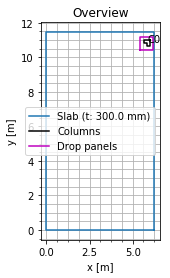

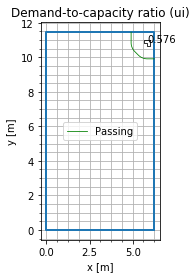

In [4]:
slab.postprocessor.plot_geometry()
slab.postprocessor.plot_ui()

In [5]:
json.loads(slab.to_json())

{'Columns': {'C0': {'Position': 'corner',
   'Geometry': {'Centroid': {'x [m]': 5.861, 'y [m]': 10.861},
    'Bounding box': {'bx [mm]': 350.0, 'by [mm]': 350.0}},
   'Effective depth [mm]': 270.0,
   'Tensile Reinforcement': {'Effective tensile region': {'bx [mm]': 1373.6,
     'by [mm]': 1373.6,
     'Centroid (offset)': {'dx [mm]': '-298.2', 'dy [mm]': '-198.2'}},
    'x-axis': 'T10@200',
    'y-axis': 'T10@200',
    'ρx': 0.0015,
    'ρy': 0.0015,
    'ρl': 0.0015},
   'Drop panel': {'lx [mm]': 200.0, 'ly [mm]': 200.0, 'H [mm]': 200.0},
   'Design': {'Perimeter u0': {'Most adverse loadcase': {'name': 'LC0',
      'Ved [kN]': 111.0,
      'Mex [kN.m]': 25.0,
      'Mey [kN.m]': 22.0,
      'ex [mm]': -198.2,
      'ey [mm]': 225.2},
     'β': 2.722,
     'ved [kPa]': 918.2,
     'vrd [kPa]': 5280.0,
     'DCR (ved/vrd)': '0.174'},
    'Perimeter u1': {'Most adverse loadcase': {'name': 'LC0',
      'Ved [kN]': 111.0,
      'Mex [kN.m]': 25.0,
      'Mey [kN.m]': 22.0,
      'ex [mm]'